In [1]:
import numpy as np


import leap_sim_utils.leapsim_utils as lhus
import time
import mujoco
import mujoco.viewer

import mujoco
import numpy as np
import matplotlib.pyplot as plt
import mujoco.viewer

import mediapy as media
import time

import matplotlib.pyplot as plt

from mujoco_main import LeapNodeMujoco

In [3]:
model_path = '/home/sysidea/leap_hand_mujoco/model/leap hand/index_thumb.xml'
leap_hand = LeapNodeMujoco(model_path)

m = mujoco.MjModel.from_xml_path(model_path)
d = mujoco.MjData(m)

ValueError: ParseXML: Error opening file 'model/leap hand/index_thumb.xml': No such file or directory

In [9]:
# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

In [10]:
duration = 3.8  # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetData(m,d)  # Reset state and time.
with mujoco.Renderer(m) as renderer:
  while d.time < duration:
    mujoco.mj_step(m,d)
    if len(frames) < d.time * framerate:
      renderer.update_scene(d,scene_option=scene_option)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)

In [13]:
print('Total number of DoFs in the model:', m.nv)
print('Generalized positions:', d.qpos)
print('Generalized velocities:', d.qvel)

Total number of DoFs in the model: 14
Generalized positions: [-4.39944281e-02 -2.40339795e-02  4.87342829e-02  9.93668550e-01
 -6.20966834e-04 -6.61592079e-03  1.12154614e-01  1.35295059e+00
 -2.35985222e-02  6.54490700e-02  2.82868645e-02  2.05991899e+00
 -1.33455015e-01 -2.62394455e-01  9.32452921e-03]
Generalized velocities: [-0.00352316  0.0010911  -0.00025492  0.0004287   0.00525168  0.08044704
  0.07999095 -0.03373484 -0.04753044 -0.00688379 -0.00569516  0.03911017
 -0.03649345  0.00672498]


""

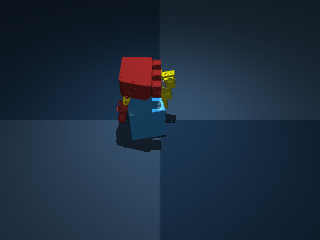

In [17]:
mujoco.mj_forward(m,d)
with mujoco.Renderer(m) as renderer:
  renderer.update_scene(d)

  media.show_image(renderer.render())